Mean Squared Error for predicting grades: 0.15213784725315457
R-squared value for predicting grades: 0.99


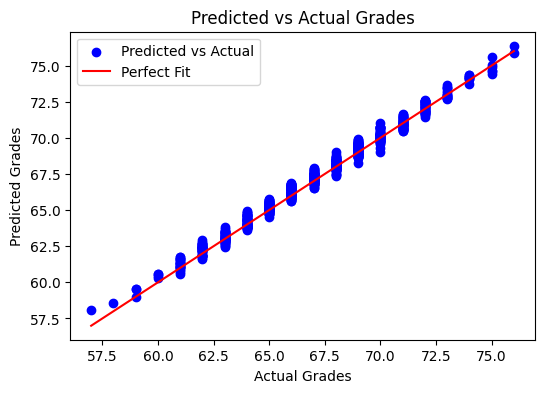

In [6]:
import tkinter as tk
from tkinter import messagebox, StringVar
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import webbrowser


# Load your dataset
data = pd.read_csv(r"C:\Users\kaeli\OneDrive - Richfield Graduate Institute of Technology\Courses\1st Year\Data science\Semseter 2\Project final\Score vision\StudentPerformanceFactors.csv")


# Define the feature and target variable for predicting the grades
X_grades = data.drop(columns=['Exam_Score'])
y_grades = data['Exam_Score']

# Identify categorical columns
categorical_cols = X_grades.select_dtypes(include=['object']).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_grades.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the dataset into training and testing sets for predicting grades
X_train_grades, X_test_grades, y_train_grades, y_test_grades = train_test_split(X_grades, y_grades, test_size=0.1, random_state=5981)

# Train the linear regression model
pipeline.fit(X_train_grades, y_train_grades)

# Make predictions for the test set
y_pred_grades = pipeline.predict(X_test_grades)

# Evaluate the model
mse_grades = mean_squared_error(y_test_grades, y_pred_grades)
r2_grades = r2_score(y_test_grades, y_pred_grades)
print(f"Mean Squared Error for predicting grades: {mse_grades}")
print(f"R-squared value for predicting grades: {r2_grades:.2f}")

# Create or connect to SQLite database for login/signup
conn = sqlite3.connect('users.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS users (username TEXT PRIMARY KEY, password TEXT)''')
conn.commit()

# Function for signing up a new user
def sign_up():
    username = entry_signup_username.get()
    password = entry_signup_password.get()

    if username == "" or password == "":
        messagebox.showerror("Error", "Both fields are required")
    else:
        try:
            cursor.execute("SELECT * FROM users WHERE username=?", (username,))
            if cursor.fetchone():
                messagebox.showerror("Error", "Username already exists")
            else:
                cursor.execute("INSERT INTO users (username, password) VALUES (?, ?)", (username, password))
                conn.commit()
                messagebox.showinfo("Success", "Sign-up successful!")
                signup_window.destroy()
        except sqlite3.Error as e:
            messagebox.showerror("Database Error", f"An error occurred: {e}")

# Function for logging in an existing user
def login():
    username = entry_login_username.get()
    password = entry_login_password.get()

    cursor.execute("SELECT * FROM users WHERE username=? AND password=?", (username, password))
    if cursor.fetchone():
        messagebox.showinfo("Success", f"Welcome, {username}!")
        login_window.destroy()
        open_grade_predictor()
    else:
        messagebox.showerror("Error", "Invalid username or password")

# Function to open the grade predictor window after login
def open_grade_predictor():
    global root
    root = tk.Tk()
    root.title("Grade Predictor")
    root.configure(bg="#006400")
    root.geometry("500x900")

    padx = 10
    pady = 5

    label_font = ("Arial", 12, "bold")
    entry_font = ("Arial", 10)

    def create_label(text, row):
        label = tk.Label(root, text=text, font=label_font, bg="#006400", fg="white")
        label.grid(row=row, padx=padx, pady=pady, sticky="w")

    def create_entry(row):
        entry = tk.Entry(root, font=entry_font)
        entry.grid(row=row, column=1, padx=padx, pady=pady)
        return entry

    def create_option_menu(variable, options, row):
        option_menu = tk.OptionMenu(root, variable, *options)
        option_menu.config(bg="black", fg="#32CD32", font=entry_font)
        option_menu.grid(row=row, column=1, padx=padx, pady=pady)

    # Function to plot the graph
    def plot_predicted_vs_actual():
        fig, ax = plt.subplots(figsize=(6, 4))

        ax.scatter(y_test_grades, y_pred_grades, color="blue", label="Predicted vs Actual")
        ax.plot([min(y_test_grades), max(y_test_grades)], [min(y_test_grades), max(y_test_grades)], color="red", label="Perfect Fit")

        ax.set_xlabel("Actual Grades")
        ax.set_ylabel("Predicted Grades")
        ax.set_title("Predicted vs Actual Grades")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas.draw()
        canvas.get_tk_widget().grid(row=21, columnspan=2, padx=20, pady=20)

    # Function to predict grades based on the user input
    def predict_grade():
        try:
            # Extract the user inputs
            hours_studied = float(entry_hours_studied.get())
            attendance = float(entry_attendance.get())
            parental_involvement = var_parental_involvement.get()
            access_to_resources = var_access_to_resources.get()
            extracurricular_activities = var_extracurricular_activities.get()
            sleep_hours = float(entry_sleep_hours.get())
            previous_scores = float(entry_previous_scores.get())
            motivation_level = var_motivation_level.get()
            internet_access = var_internet_access.get()
            tutoring_sessions = float(entry_tutoring_sessions.get())
            family_income = var_family_income.get()
            teacher_quality = var_teacher_quality.get()
            school_type = var_school_type.get()
            peer_influence = var_peer_influence.get()
            physical_activity = float(entry_physical_activity.get())
            learning_disabilities = var_learning_disabilities.get()
            parental_education_level = var_parental_education_level.get()
            distance_from_home = var_distance_from_home.get()
            gender = var_gender.get()

            # Create the input data in a dictionary
            student_data = {
                'Hours_Studied': [hours_studied],
                'Attendance': [attendance],
                'Sleep_Hours': [sleep_hours],
                'Previous_Scores': [previous_scores],
                'Tutoring_Sessions': [tutoring_sessions],
                'Physical_Activity': [physical_activity],
                
                # Categorical variables
                'Parental_Involvement': [parental_involvement],
                'Access_to_Resources': [access_to_resources],
                'Extracurricular_Activities': [extracurricular_activities],
                'Motivation_Level': [motivation_level],
                'Internet_Access': [internet_access],
                'Family_Income': [family_income],
                'Teacher_Quality': [teacher_quality],
                'School_Type': [school_type],
                'Peer_Influence': [peer_influence],
                'Learning_Disabilities': [learning_disabilities],
                'Parental_Education_Level': [parental_education_level],
                'Distance_from_Home': [distance_from_home],
                'Gender': [gender]
            }

            student_data_df = pd.DataFrame(student_data)

            # Ensure categorical variables have correct data types (string/object)
            for col in categorical_cols:
                student_data_df[col] = student_data_df[col].astype(str)

            # Predict the grade
            predicted_grade = pipeline.predict(student_data_df)

            # Show the prediction result
            messagebox.showinfo("Prediction", f"The predicted grade (Exam Score) is: {predicted_grade[0]:.2f}")

        except ValueError as e:
            messagebox.showwarning("Input Error", f"Please enter valid values for all fields. Error: {e}")

    create_label("Hours Studied", 0)
    entry_hours_studied = create_entry(0)

    create_label("Attendance", 1)
    entry_attendance = create_entry(1)

    create_label("Parental Involvement", 2)
    var_parental_involvement = StringVar(root)
    var_parental_involvement.set("Low")
    create_option_menu(var_parental_involvement, ["Low", "Medium", "High"], 2)

    create_label("Access to Resources", 3)
    var_access_to_resources = StringVar(root)
    var_access_to_resources.set("Low")
    create_option_menu(var_access_to_resources, ["Low", "Medium", "High"], 3)

    create_label("Extracurricular Activities", 4)
    var_extracurricular_activities = StringVar(root)
    var_extracurricular_activities.set("No")
    create_option_menu(var_extracurricular_activities, ["Yes", "No"], 4)

    create_label("Sleep Hours", 5)
    entry_sleep_hours = create_entry(5)

    create_label("Previous Scores", 6)
    entry_previous_scores = create_entry(6)

    create_label("Motivation Level", 7)
    var_motivation_level = StringVar(root)
    var_motivation_level.set("Low")
    create_option_menu(var_motivation_level, ["Low", "Medium", "High"], 7)

    create_label("Internet Access", 8)
    var_internet_access = StringVar(root)
    var_internet_access.set("No")
    create_option_menu(var_internet_access, ["Yes", "No"], 8)

    create_label("Tutoring Sessions", 9)
    entry_tutoring_sessions = create_entry(9)

    create_label("Family Income", 10)
    var_family_income = StringVar(root)
    var_family_income.set("Low")
    create_option_menu(var_family_income, ["Low", "Medium", "High"], 10)

    create_label("Teacher Quality", 11)
    var_teacher_quality = StringVar(root)
    var_teacher_quality.set("Low")
    create_option_menu(var_teacher_quality, ["Low", "Medium", "High"], 11)

    create_label("School Type", 12)
    var_school_type = StringVar(root)
    var_school_type.set("Public")
    create_option_menu(var_school_type, ["Public", "Private"], 12)

    create_label("Peer Influence", 13)
    var_peer_influence = StringVar(root)
    var_peer_influence.set("Positive")
    create_option_menu(var_peer_influence, ["Positive", "Neutral", "Negative"], 13)

    create_label("Physical Activity", 14)
    entry_physical_activity = create_entry(14)

    create_label("Learning Disabilities", 15)
    var_learning_disabilities = StringVar(root)
    var_learning_disabilities.set("No")
    create_option_menu(var_learning_disabilities, ["Yes", "No"], 15)

    create_label("Parental Education Level", 16)
    var_parental_education_level = StringVar(root)
    var_parental_education_level.set("High School")
    create_option_menu(var_parental_education_level, ["High School", "College", "Postgraduate"], 16)

    create_label("Distance from Home", 17)
    var_distance_from_home = StringVar(root)
    var_distance_from_home.set("Near")
    create_option_menu(var_distance_from_home, ["Near", "Moderate" "Far"], 17)

    create_label("Gender", 18)
    var_gender = StringVar(root)
    var_gender.set("Male")
    create_option_menu(var_gender, ["Male", "Female"], 18)

    predict_button = tk.Button(root, text="Predict Grade", command=predict_grade, font=("Arial", 12), bg="black", fg="#32CD32")
    predict_button.grid(row=19, columnspan=2, pady=10)

    plot_button = tk.Button(root, text="Show Predicted vs Actual", command=plot_predicted_vs_actual, font=("Arial", 12), bg="black", fg="#32CD32")
    plot_button.grid(row=20, columnspan=2, pady=10)

    root.mainloop()

# Function to open the sign-up window
def open_signup_window():
    global signup_window
    signup_window = tk.Toplevel(login_window)
    signup_window.title("Sign Up")
    signup_window.configure(bg="green")
    signup_window.geometry("300x350")

    tk.Label(signup_window, text="Sign Up", font=("Arial", 16), bg="green").pack(pady=10)

    tk.Label(signup_window, text="Username", font=("Arial", 12), bg="green").pack()
    global entry_signup_username
    entry_signup_username = tk.Entry(signup_window, width=30)
    entry_signup_username.pack(pady=5)

    tk.Label(signup_window, text="Password", font=("Arial", 12), bg="green").pack()
    global entry_signup_password
    entry_signup_password = tk.Entry(signup_window, show="*", width=30)
    entry_signup_password.pack(pady=5)

    tk.Button(signup_window, text="Sign Up", command=sign_up, font=("Arial", 12), bg="black", fg="green").pack(pady=10)

# Function to handle closing the app and the database connection
def on_closing():
    if messagebox.askokcancel("Quit", "Do you want to quit?"):
        conn.close()  # Close the database connection when the app closes
        login_window.destroy()
        
def open_help_page():
    webbrowser.open("ScoreVision.html")
    
    
# Create the login window
login_window = tk.Tk()
login_window.title("Login")
login_window.configure(bg="green")
login_window.geometry("300x350")

tk.Label(login_window, text="Login", font=("Arial", 16), bg="green").pack(pady=10)

tk.Label(login_window, text="Username", font=("Arial", 12), bg="green").pack()
entry_login_username = tk.Entry(login_window, width=30)
entry_login_username.pack(pady=5)

tk.Label(login_window, text="Password", font=("Arial", 12), bg="green").pack()
entry_login_password = tk.Entry(login_window, show="*", width=30)
entry_login_password.pack(pady=5)

tk.Button(login_window, text="Login", command=login, font=("Arial", 12), bg="black", fg="green").pack(pady=10)

tk.Button(login_window, text="Sign Up", command=open_signup_window, font=("Arial", 12), bg="black", fg="green").pack(pady=10)

tk.Button(login_window, text="Help", command=open_help_page, font=("Arial", 12), bg="black", fg="green").pack(pady=10)

# Set the protocol to handle the window close event
login_window.protocol("WM_DELETE_WINDOW", on_closing)

login_window.mainloop()